In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
dus14 = pd.read_csv('DUS2014.csv')   #nuskaitome failus ir pirskiriame kintamuosius
dus18 = pd.read_csv('DUS2018.csv')

In [26]:
d14s = dus14[['lytis', 'amzius', 'issilavinimas', 'bdu_spalio', 'profesija']] #susikuriame mazesne lentele

In [27]:
d18s = dus18[['lytis', 'amzius', 'issilavinimas', 'bdu_spalio', 'profesija']] #susikuriame mazesne lentele

In [28]:
d14s

,lytis,amzius,issilavinimas,bdu_spalio,profesija
0,M,20-29,G4,6.00,261
1,F,20-29,G2,6.00,334
2,F,40-49,G4,6.00,221
3,F,30-39,G4,6.00,332
4,M,40-49,G2,11.33,962
...,...,...,...,...,...
44947,F,50-59,G4,3393.00,235
44948,F,30-39,G4,3639.67,233
44949,F,50-59,G4,3670.00,231
44950,F,30-39,G4,4212.00,231


In [29]:
# suraskite ir isspausdinkite vidutinius vyru bei moteru atlyginimus (spalio)
# 2014 ir 2018 metams
# 2014 vyru x, moteru y
# 2018 vyru x, moteru y

vyru14 = d14s[d14s["lytis"]=="M"]  
vyruvid14 = vyru14["bdu_spalio"].mean()
mot14 = d14s[d14s["lytis"]=="F"]  
moteruvid14 = mot14["bdu_spalio"].mean()
print("2014 vyru:" , vyruvid14/3.4528 ,"," ,  "2014 moteru:" ,moteruvid14/3.4528 )        

vyru18 = d18s[d18s["lytis"]=="M"]  
vyruvid18 = vyru18["bdu_spalio"].mean()
mot18 = d18s[d18s["lytis"]=="F"]  
moteruvid18 = mot18["bdu_spalio"].mean()
print("2018 vyru:" , vyruvid18 ,"," ,  "2018 moteru:" ,moteruvid18 )

2014 vyru: 762.7704309291468 , 2014 moteru: 607.4431355450901
2018 vyru: 1014.4962626801922 , 2018 moteru: 832.1469450889405


In [21]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
bdu_spalio = d14s['bdu_spalio'].values
bdu_eurais = bdu_spalio/3.4528
d14s['bdueu'] = bdu_eurais
d14s.head(10)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdueu
0,M,20-29,G4,6.00,261,1.737720
1,F,20-29,G2,6.00,334,1.737720
2,F,40-49,G4,6.00,221,1.737720
3,F,30-39,G4,6.00,332,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
7,F,20-29,G2,13.33,531,3.860635
8,M,20-29,G1,6.67,912,1.931766
9,M,40-49,G2,6.00,332,1.737720


In [31]:
d14s['bdueu'] = d14s['bdu_spalio']/3.4528

In [32]:
# .query() metodo nera skaidrese
d14s.query('lytis == "M"')

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdueu
0,M,20-29,G4,6.00,261,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
8,M,20-29,G1,6.67,912,1.931766
...,...,...,...,...,...,...
44925,M,40-49,G4,7849.67,134,2273.421571
44927,M,30-39,G4,1793.00,231,519.288693
44931,M,50-59,G4,3246.00,232,940.106580
44934,M,60+,G4,3819.67,231,1106.252896


In [33]:
d14s.query('lytis == "M" and issilavinimas == "G3"')

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdueu
11,M,20-29,G3,9.67,315,2.800626
18,M,60+,G3,6.00,312,1.737720
19,M,20-29,G3,6.00,333,1.737720
21,M,20-29,G3,28.67,241,8.303406
25,M,50-59,G3,6.00,261,1.737720
...,...,...,...,...,...,...
44805,M,40-49,G3,3685.00,233,1067.249768
44808,M,60+,G3,2692.00,235,779.657090
44843,M,20-29,G3,1625.00,235,470.632530
44914,M,40-49,G3,3444.33,234,997.546918


In [34]:
edu = input('Iveskite issilavinimo koda (G1, G2, G3, G4)')
ats = d14s.query('issilavinimas == @edu')  # pries kintamaji reikia parasyti @ !!!!!!!
ats.head(3)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdueu
1,F,20-29,G2,6.00,334,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720


In [44]:
# parašykite for ciklą, kuris išspausdintų išsilavinimo kodą ir vidutinį atlyginimą
# respondentų su tuo išsilavinimo kodu.
# naudokite .query() metodą
edus = ['G1', 'G2', 'G3', 'G4']

for edu in edus:
    vidutinis_atlyginimas = d14s.query('issilavinimas == @edu')['bdueu'].mean()
    print(f"Issilavinimas: {edu}, Vidutinis atlyginimas: {vidutinis_atlyginimas}")



Issilavinimas: G1, Vidutinis atlyginimas: 474.7446499958954
Issilavinimas: G2, Vidutinis atlyginimas: 543.8925813045148
Issilavinimas: G3, Vidutinis atlyginimas: 730.4106784275447
Issilavinimas: G4, Vidutinis atlyginimas: 1011.9653972982893


In [59]:
# RASOS SPRENDIMAS
# parašykite for ciklą, kuris išspausdintų išsilavinimo kodą ir vidutinį atlyginimą
# respondentų su tuo išsilavinimo kodu.
# naudokite .query() metodą
edus = ['G1', 'G2', 'G3', 'G4']
g1_issilavinimas = d14s.query('issilavinimas == "G1"')
for kodas in edus:
    vidurkis = d14s.query('issilavinimas == @kodas')['bdueu'].mean()
    print(kodas, vidurkis)

G1 474.7446499958954
G2 543.8925813045148
G3 730.4106784275447
G4 1011.9653972982893


In [95]:
# DESTYTOJO SPRENDIMAS
# parašykite for ciklą, kuris išspausdintų išsilavinimo kodą ir vidutinį atlyginimą
# respondentų su tuo išsilavinimo kodu.
# naudokite .query() metodą
edus = ['G1', 'G2', 'G3', 'G4']
for i in edus:
    g = d14s.query('issilavinimas == @i')['bdueu'].mean()
    print(i, g)

G1 474.7446499958954
G2 543.8925813045148
G3 730.4106784275447
G4 1011.9653972982893


In [60]:
def ltltoEuro(litas):
    euras = litas/3.45280
    return euras

d14s['Eurai is funkcijos'] = d14s['bdu_spalio'].apply(ltltoEuro)

In [67]:
d14s.head(6)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdueu,Eurai is funkcijos
0,M,20-29,G4,6.00,261,1.737720,1.737720
1,F,20-29,G2,6.00,334,1.737720,1.737720
2,F,40-49,G4,6.00,221,1.737720,1.737720
3,F,30-39,G4,6.00,332,1.737720,1.737720
4,M,40-49,G2,11.33,962,3.281395,3.281395
5,M,30-39,G2,6.00,122,1.737720,1.737720


In [66]:
d14s.drop(columns=['Eurai os funkcijos'], inplace=True)  # pasirinkto stulpelio panaikinimas
d14s.head

<bound method NDFrame.head of       lytis amzius issilavinimas  bdu_spalio  profesija        bdueu  \
0         M  20-29            G4        6.00        261     1.737720   
1         F  20-29            G2        6.00        334     1.737720   
2         F  40-49            G4        6.00        221     1.737720   
3         F  30-39            G4        6.00        332     1.737720   
4         M  40-49            G2       11.33        962     3.281395   
...     ...    ...           ...         ...        ...          ...   
44947     F  50-59            G4     3393.00        235   982.680723   
44948     F  30-39            G4     3639.67        233  1054.121293   
44949     F  50-59            G4     3670.00        231  1062.905468   
44950     F  30-39            G4     4212.00        231  1219.879518   
44951     F  40-49            G4     4218.00        231  1221.617238   

       Eurai is funkcijos  
0                1.737720  
1                1.737720  
2                1.73

In [68]:
# parašykite kodą, kuris pridėtų naują stulpelį prie d14s lentelės
#  kur būtų tokie žodžiai:
# Vyras, jei stulpelyje lytis buvo M raidė
# Moteris, jei stulpelyje lytis buvo F raidė

def LTlytis(lytis):
    if lytis == "M":
        return "Vyras"
    else:
        return "Moteris"
d14s["Lytis Lietuviskai"] = d14s["lytis"].apply(LTlytis)  
d14s.head(6)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdueu,Eurai is funkcijos,Lytis Lietuviskai
0,M,20-29,G4,6.00,261,1.737720,1.737720,Vyras
1,F,20-29,G2,6.00,334,1.737720,1.737720,Moteris
2,F,40-49,G4,6.00,221,1.737720,1.737720,Moteris
3,F,30-39,G4,6.00,332,1.737720,1.737720,Moteris
4,M,40-49,G2,11.33,962,3.281395,3.281395,Vyras
5,M,30-39,G2,6.00,122,1.737720,1.737720,Vyras


In [ ]:
# SARUNO SUDETINGESNIS SPRENDIMAS
# parašykite kodą, kuris pridėtų naują stulpelį prie d14s lentelės
#  kur būtų tokie žodžiai:
# Vyras, jei stulpelyje lytis buvo M raidė
# Moteris, jei stulpelyje lytis buvo F raidė

def zodzioKeitimas():
    lytys = []
    for x in dus14['lytis'].values:
        if x == 'M':
            lytys.append('Vyras')
        else:
            lytys.append('Moteris')
    return lytys
zodzioKeitimas()
d14s['Vyrai ir Moterys'] = zodzioKeitimas()
d14s.head(15)

In [71]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_DATE', 'OCCUR_TIME'])  # sep=';' sutvarke i normalius stulpelius
nypd.head(2)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,201575314,2019-08-23,2024-04-11 22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,205748546,2019-11-27,2024-04-11 15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571


In [74]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})  # teisingai sutvarkyta data ir laikas. Sudetingiausia parse_dates 
nypd.head(3)

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,2019-08-23 22:10:00,201575314,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,2019-11-27 15:54:00,205748546,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571
2,2019-02-02 19:40:00,193118596,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480


In [83]:
# .dt modulis, veikia tik tada, jei stulpelis DataFrame yra datetime tipo

nypd_small = nypd[['DATA', 'BORO', 'STATISTICAL_MURDER_FLAG']]   # susimazinome lentele
nypd_small.head(5)

,DATA,BORO,STATISTICAL_MURDER_FLAG
0,2019-08-23 22:10:00,QUEENS,False
1,2019-11-27 15:54:00,BRONX,False
2,2019-02-02 19:40:00,MANHATTAN,False
3,2019-10-24 00:52:00,STATEN ISLAND,True
4,2019-08-22 18:03:00,BRONX,False


In [85]:
nypd_small['MonthNumber'] = nypd_small['DATA'].dt.month              #.dt veikia tik jei turim datos laiko stulpeli
nypd_small['Hour'] = nypd_small['DATA'].dt.hour
nypd_small['HR'] = nypd_small['DATA'].dt.round('H').dt.hour
nypd_small['MonthName'] = nypd_small['DATA'].dt.month_name()
nypd_small.head(3)

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNumber,Hour,HR,MonthName
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February


In [91]:
# .value_counts()

# sukurkite du naujus stulpelius
# viename turi būti paros laikas ('Rytas, Vakaras, etc)
# kitame metų laikas (žiema, vasara, etc)
# naudokite stulpelius Hour ir MonthNr

def para(x):
    if x >= 22 or x < 6:
        return 'Naktis'
    elif x >= 6 and x < 10:
        return 'Rytas'
    elif x >= 10 and x < 16:
        return 'Diena'
    else:
        return 'Vakaras'

def metai(x):
    if x in [12,1,2]:
        return 'Žiema'
    elif x in [3,4,5]:
        return 'Pavasaris'
    elif x in [6,7,8]:
        return 'Vasara'
    else:
        return 'Ruduo'

nypd_small['ParosL'] = nypd_small['Hour'].apply(para)
nypd_small['MetųL'] = nypd_small['MonthNumber'].apply(metai)
nypd_small.head()



,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNumber,Hour,HR,MonthName,ParosL,MetųL
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August,Naktis,Vasara
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November,Diena,Ruduo
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February,Vakaras,Žiema
3,2019-10-24 00:52:00,STATEN ISLAND,True,10,0,1,October,Naktis,Ruduo
4,2019-08-22 18:03:00,BRONX,False,8,18,18,August,Vakaras,Vasara


In [99]:
nypd_small['MonthName'].value_counts().sort_index(ascending=True)  #.value_counts() suskaiciuoja pasikartojancias vertes. .sort_values(ascending=True) leidzia isrusiuoti didejimo arba mazejimo tvarka   
                                                                   # .sort_index(ascending=True) rusiuoja pagal abecele. Visada pirmas stulpelis index, antras values

MonthName
April        1578
August       2462
December     1601
February     1098
January      1411
July         2482
June         2192
March        1331
May          2037
November     1550
October      1851
September    2033
Name: count, dtype: int64

In [100]:
shootings = nypd_small['MonthName'].value_counts()
months = shootings.index
counts = shootings.values
print(months, counts, sep='\n')

Index(['July', 'August', 'June', 'May', 'September', 'October', 'December',
       'April', 'November', 'January', 'March', 'February'],
      dtype='object', name='MonthName')
[2482 2462 2192 2037 2033 1851 1601 1578 1550 1411 1331 1098]


In [101]:
nypd_small['MonthNumber'].value_counts().sort_index(ascending=True) #menesiai eiles tvarka

MonthNumber
1     1411
2     1098
3     1331
4     1578
5     2037
6     2192
7     2482
8     2462
9     2033
10    1851
11    1550
12    1601
Name: count, dtype: int64

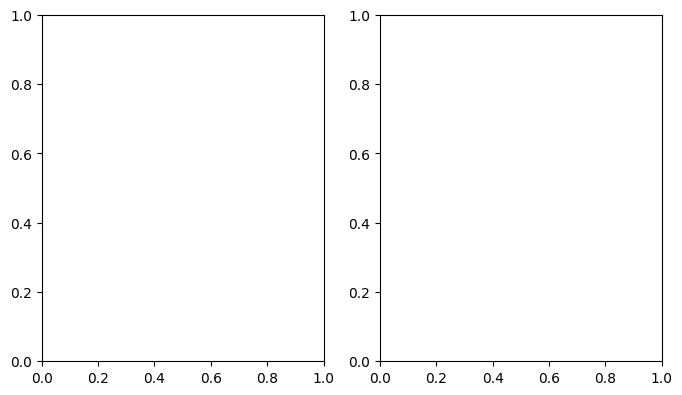

In [109]:
# plt.subplots():
langas, grafikas = plt.subplots(1, 2, figsize=[8,4.5])  #16:9


plt.show()

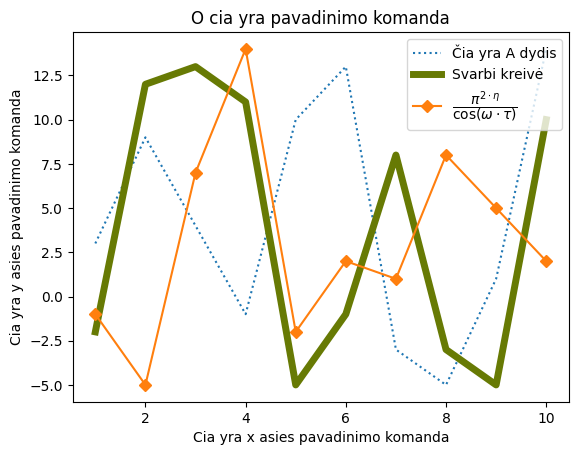

In [130]:
# plt.subplots():
a = np.arange(1,11)
b = np.random.randint(-5, 15, 10)
c = np.random.randint(-5, 15, 10)
d = np.random.randint(-5, 15, 10)
langas, grafikas = plt.subplots()
# .plot() metodas: taikomas grafikui nubraizyti
grafikas.plot(a,b, label="Čia yra A dydis", linestyle=":")
grafikas.plot(a,c, label="Svarbi kreivė", linewidth=5, color='xkcd:olive green')
grafikas.plot(a,d, label=r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$', marker='D')

grafikas.set_xlabel("Cia yra x asies pavadinimo komanda")
grafikas.set_ylabel("Cia yra y asies pavadinimo komanda")
grafikas.set_title("O cia yra pavadinimo komanda")
grafikas.legend(loc='best')   #best vietoj galima isirasyti 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

plt.show()

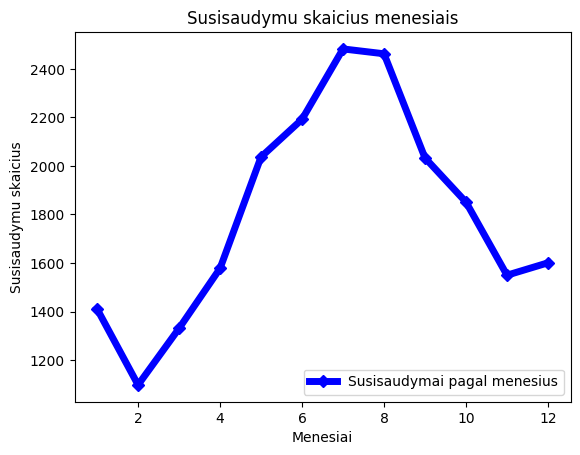

In [172]:
# turite nypd susišaudymų duomenis.
# nubraižykite vizualizaciją, naudodami ką tik pateiktą pavyzdį, 
# kad matytumėme, kurį monėsį yra daugiausiai, mažiausiai užfiksduotų
# susišaudymų
# sudėkite prasmingus ašių pavadinimus

# plt.subplots():
months = nypd_small['MonthNumber'].value_counts().sort_index(ascending=True).index
shootings = nypd_small['MonthNumber'].value_counts().sort_index(ascending=True).values

langas, grafikas = plt.subplots()

# .plot() metodas:
grafikas.plot(months, shootings, label="Susisaudymai pagal menesius", linewidth = 5, marker ='D', color="blue")

grafikas.set_xlabel("Menesiai")
grafikas.set_ylabel("Susisaudymu skaicius")
grafikas.set_title("Susisaudymu skaicius menesiais")
grafikas.legend(loc="best")

plt.show()



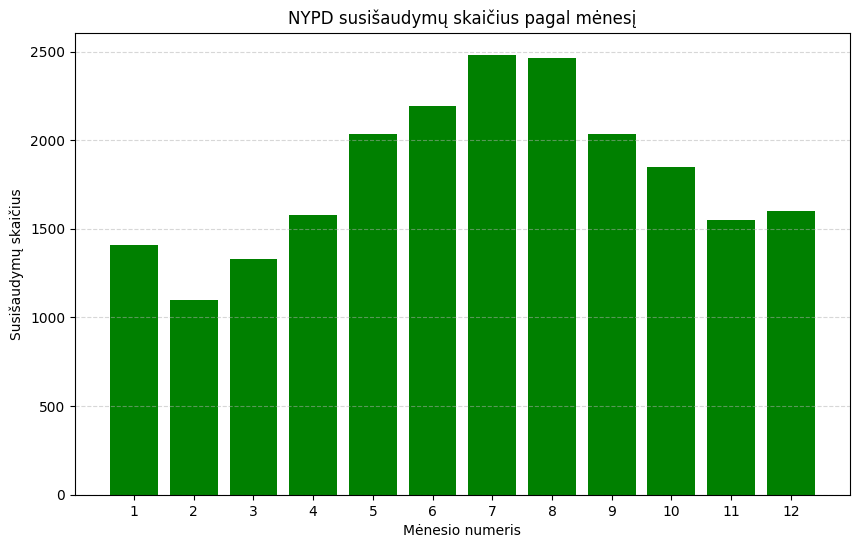

In [155]:
months = nypd_small['MonthNumber'].value_counts().sort_index(ascending=True).index
shootings = nypd_small['MonthNumber'].value_counts().sort_index(ascending=True).values

plt.figure(figsize=(10, 6)) 
plt.bar(months, shootings, color='green') 
plt.xlabel('Mėnesio numeris') 
plt.ylabel('Susišaudymų skaičius') 
plt.title('NYPD susišaudymų skaičius pagal mėnesį') 
plt.xticks(months) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

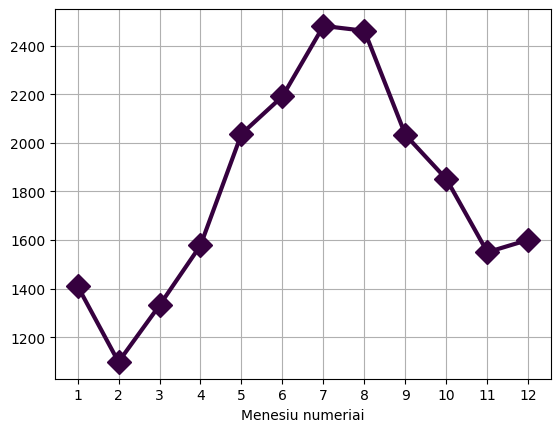

In [166]:
months_counts = nypd_small['MonthNumber'].value_counts().sort_index(ascending=True)
months = months_counts.index
counts = months_counts.values

fig, ax = plt.subplots()
ax.plot(months, counts, lw=3, c='xkcd:deep purple', marker='D', ms=12)

ax.set_xticks(months) # vietoj (moths) galima ivesti norimus skaicius x asyje
#ax.set_xlim(-5, 15) # x asies ribu keitimas
ax.grid()  #tinklelio uzdejimas
ax.set_xlabel("Menesiu numeriai")

plt.show()

In [181]:
months = nypd_small[['MonthName', 'MonthNumber']].value_counts().reset_index().sort_values(by='MonthNumber')

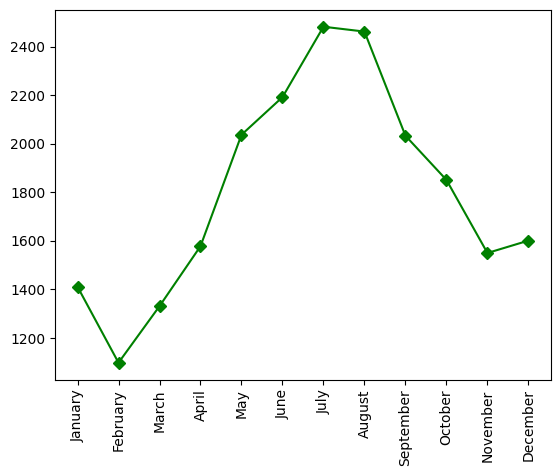

In [194]:
months = nypd_small[['MonthName', 'MonthNumber']].value_counts().reset_index().sort_values(by='MonthNumber')
fig, ax = plt.subplots()

mnames = months['MonthName'].values
mnumbers = months['MonthNumber']
counts = months['count'].values

ax.plot(mnumbers, counts, marker='D', c='green')
ax.set_xticks(mnumbers)
ax.set_xticklabels(mnames, rotation=90)

plt.show()

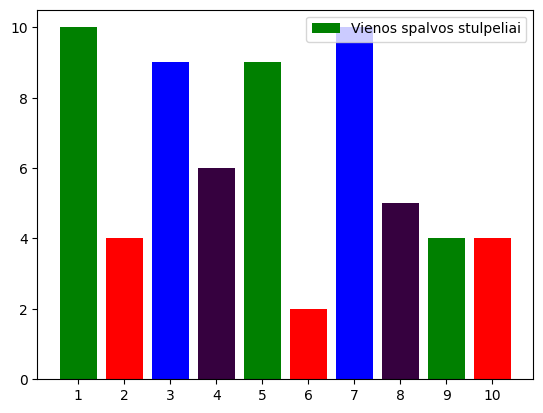

In [17]:
# bar grafikai:
a = np.arange(1,11)
b = np.random.randint(1,11,10)
color_list = ['green', 'red', 'blue', 'xkcd:deep purple']

fig, ax = plt.subplots()

ax.bar(a, b, color=color_list, label='Vienos spalvos stulpeliai')  # nubraizo stulpelini grafika
ax.set_xticks(a) # panaikina skaicius po . ir gaunasi sveiki skaiciai, siuo atveju panaikino pusinius skaicius 
ax.legend(loc='best')
plt.show()

In [3]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
#import mysql.connector as cnt
#import panel as pn
#pn.extension()
#import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\Cougar\Desktop\Python Github\JupyterNoteboooks


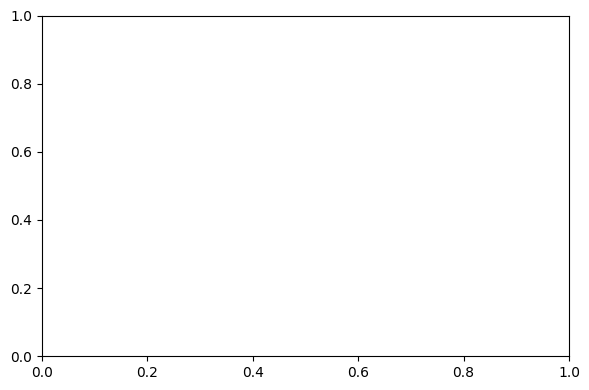

In [4]:
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:


#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

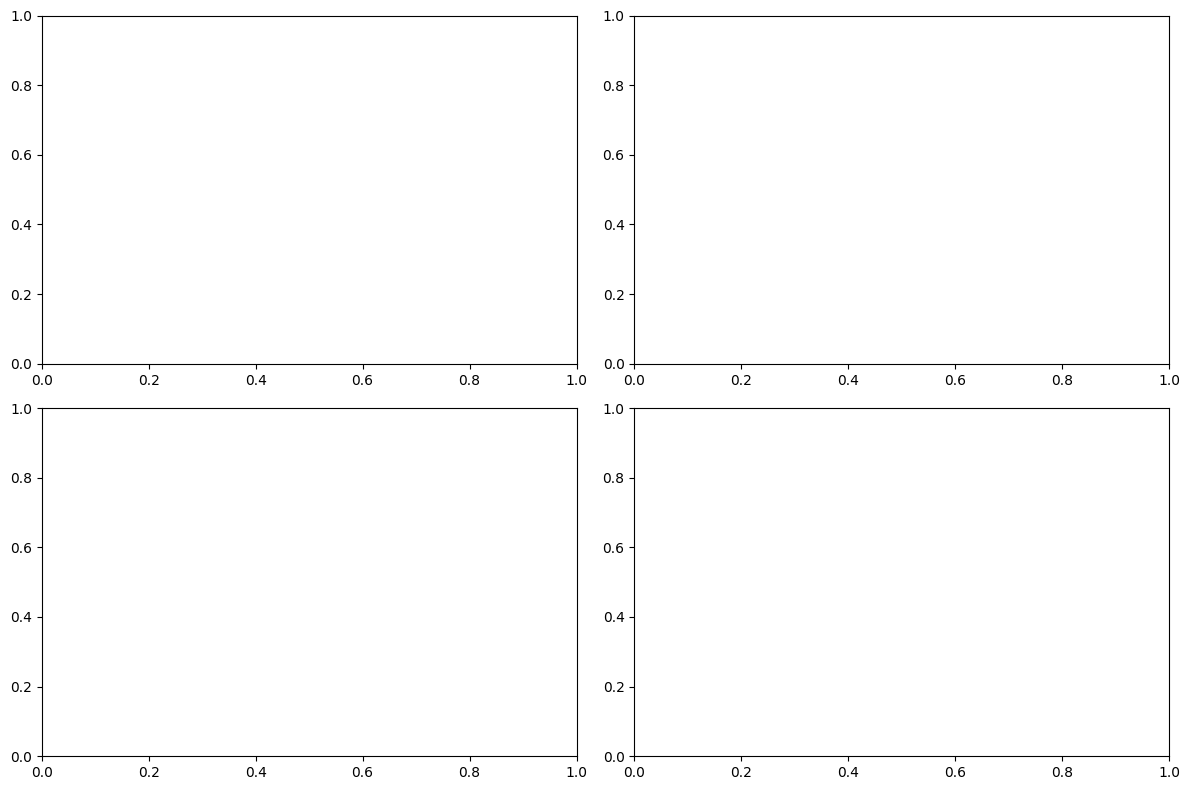

In [5]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(fwidth*2,fheight*2), gridspec_kw={'width_ratios':[1,1], 'height_ratios':[1,1]})
#ax1:
#plotting code:


#ax1.legend(loc='best')
#ax2:
#plotting code:


#ax2.legend(loc='best')
#ax3:
#plotting code:


#ax3.legend(loc='best')
#ax4:
#plotting code:


#ax4.legend(loc='best')
fig.tight_layout()
plt.show()

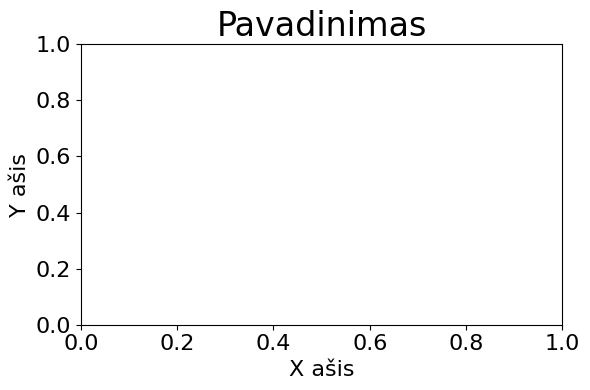

In [6]:
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:


axis.set_xlabel('X ašis', fontsize=fontsize)
axis.set_ylabel('Y ašis', fontsize=fontsize)
axis.set_title('Pavadinimas', fontsize=titlesize)
axis.tick_params(axis='x', labelsize=labelsize)
axis.tick_params(axis='y', labelsize=labelsize)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
#:imp -importavimui  templeitai!!!!!!!!!!!!!!!!!!!!!
#:sfig - vienam grafikui
#fig - 1nm grafikui su daugiau kodo